In [2]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

con = psycopg2.connect("dbname=test1")

## Users selection
We distinguish users kind :
    
* "instructor"
* "administrator"
* "demo"

In [3]:
# subs = generate_submissions(users=10, pbls=100)
users = pd.read_sql_query("select user_id, creation_date from users \
                            where demo=0 and instructor=0 and administrator=0\
                            ", con=con)

lusers = users.user_id.tolist()
usersstr = str(lusers).strip('[]')

## Problems selection
We only analyse 'Pxxxxx' type problems

In [4]:
probs = pd.read_sql_query("select problem_nm from problems where problem_id like 'P%%'\
                          ", con=con)

# problem_id like 'P%%'

lprobs = [p[0] for p in probs.values if p[0]]
lprobsstr = str(lprobs).strip('[]')

## Sublissions selection

In [5]:
submissions = pd.read_sql_query("select submission_uid, user_id, problem_id, submission_id, \
                        state, time_out, time_in, veredict, score \
                        from submissions where user_id in (%s);" % (usersstr),
                                con=con)

# get rid of languages
submissions.problem_id = submissions.problem_id.apply(lambda x: x[:-3])
#submissions.set_index('submission_uid', inplace=True)

subs = submissions[submissions.problem_id.isin(lprobs)]

In [6]:
g = subs.veredict.value_counts(normalize=True)

<IPython.core.display.Javascript object>


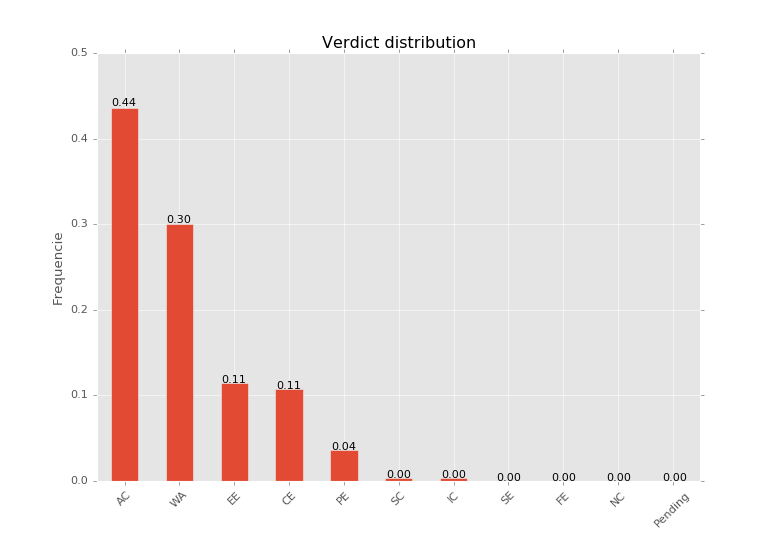

In [7]:
width = 0.35
ax = g.plot(kind='bar', rot=45)
for p in ax.patches:
    #ax.annotate(("%.2f" % p.get_height()), (p.get_x() , p.get_height()))
    ax.annotate(("%.2f" % p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


ax.set_ylim(0,0.5)
ax.set_ylabel('Frequencie')
ax.set_title('Verdict distribution')
plt.show()

In [38]:
l = [

("AC","Accepted"),
("PE","Presentation Error"),
("WA","Wrong Answer"),
("IC","Invalid Character"),
("EE","Execution Error"),
("CE","Compilation Error"),
("NC","Noncompliant Solution"),
("Pending","Pending Submission"),
("SE","Setter Error"),
("SC","Scored"),
("IE","Internal Error"),
("FE","Fatal Errors"),
]

df = pd.DataFrame(l, columns=["Acronym", "Description"])
print df[["Acronym", "Description"]].to_latex()

\begin{tabular}{lll}
\toprule
{} &  Acronym &            Description \\
\midrule
0  &       AC &               Accepted \\
1  &       PE &     Presentation Error \\
2  &       WA &           Wrong Answer \\
3  &       IC &      Invalid Character \\
4  &       EE &        Execution Error \\
5  &       CE &      Compilation Error \\
6  &       NC &  Noncompliant Solution \\
7  &  Pending &     Pending Submission \\
8  &       SE &           Setter Error \\
9  &       SC &                 Scored \\
10 &       IE &         Internal Error \\
11 &       FE &           Fatal Errors \\
\bottomrule
\end{tabular}



In [45]:

d = df.set_index("Acronym").join(g)
d.fillna(0, inplace=True)
d.sort_values(by="veredict", inplace=True, ascending=False)
d.veredict = d.veredict.apply(lambda x : "%.2f%%"%(100*x) )
d

,Description,veredict
Acronym,,
AC,Accepted,43.62%
WA,Wrong Answer,30.06%
EE,Execution Error,11.41%
CE,Compilation Error,10.70%
PE,Presentation Error,3.62%
SC,Scored,0.30%
IC,Invalid Character,0.29%
SE,Setter Error,0.01%
FE,Fatal Errors,0.00%


In [46]:
d.reset_index(inplace=True)
d

,Acronym,Description,veredict
0,AC,Accepted,43.62%
1,WA,Wrong Answer,30.06%
2,EE,Execution Error,11.41%
3,CE,Compilation Error,10.70%
4,PE,Presentation Error,3.62%
5,SC,Scored,0.30%
6,IC,Invalid Character,0.29%
7,SE,Setter Error,0.01%
8,FE,Fatal Errors,0.00%
9,NC,Noncompliant Solution,0.00%


In [47]:
print d.to_latex(index=False)

\begin{tabular}{lll}
\toprule
 Acronym &            Description & veredict \\
\midrule
      AC &               Accepted &   43.62\% \\
      WA &           Wrong Answer &   30.06\% \\
      EE &        Execution Error &   11.41\% \\
      CE &      Compilation Error &   10.70\% \\
      PE &     Presentation Error &    3.62\% \\
      SC &                 Scored &    0.30\% \\
      IC &      Invalid Character &    0.29\% \\
      SE &           Setter Error &    0.01\% \\
      FE &           Fatal Errors &    0.00\% \\
      NC &  Noncompliant Solution &    0.00\% \\
 Pending &     Pending Submission &    0.00\% \\
      IE &         Internal Error &    0.00\% \\
\bottomrule
\end{tabular}

